<center><h1> Linear Regression Framework </h1></center>
<center> An introduction to statistics </center>

# I. Import

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import math
from scipy import stats

In [36]:
#Import data
df = pd.read_csv('housing.txt', sep=" ")
df

,year,gdp,house,interests
0,1990,18873.4,133.3,0.065
1,1991,18944.0,149.3,0.066
2,1992,18992.7,144.2,0.064
3,1993,19077.6,166.4,0.069
4,1994,20185.9,195.0,0.071
5,1995,20326.4,229.8,0.070
6,1996,20434.2,228.7,0.072
7,1997,20549.2,206.1,0.072
8,1998,20718.0,257.9,0.074
9,1999,20918.3,324.1,0.075


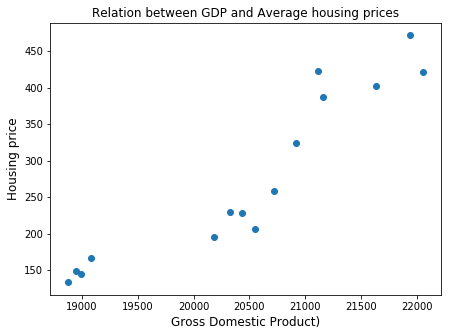

In [37]:
#Scatter plot
plt.figure(figsize=(7,5))
plt.scatter(df['gdp'], df['house'])

#Add axis titles
plt.xlabel("Gross Domestic Product)", fontsize = 12)
plt.ylabel("Housing price", fontsize = 12)
plt.title("Relation between GDP and Average housing prices")

plt.show()

# II. Parameter Estimate

In [38]:
# Slope Beta 1 :
x = df['gdp']
x_bar = np.mean(df['gdp'])
y = df['house']
y_bar = np.mean(df['house'])

beta1 = ((x - x_bar)*(y-y_bar)).sum() / ((x-x_bar)**2).sum()
print("Beta_1 coefficient estimate : " + str(round(beta1,4)))

Beta_1 coefficient estimate : 0.1012


In [39]:
beta0 = y_bar - beta1 * x_bar
print("Beta_0 coefficient estimate : " + str(round(beta0,4)))

Beta_0 coefficient estimate : -1794.0861


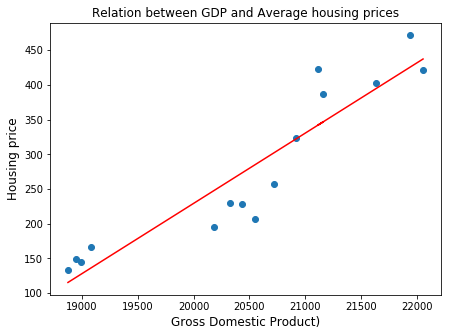

In [40]:
#Visualize the slope

plt.figure(figsize=(7,5))
plt.scatter(df['gdp'], df['house'])
plt.plot(df['gdp'], beta1 * df['gdp'] + beta0, c='r')

plt.xlabel("Gross Domestic Product)", fontsize = 12)
plt.ylabel("Housing price", fontsize = 12)
plt.title("Relation between GDP and Average housing prices")

plt.show()

In [48]:
#Using sk-learn built-in function
x_1 = df[['gdp']]
skl_linmod = lm.LinearRegression(fit_intercept = True).fit(x_1,y)

beta1_sk = skl_linmod.coef_[0]
beta0_sk = skl_linmod.intercept_

In [49]:
beta1_sk, beta0_sk

(0.10116776312363895, -1794.086079013971)

# III. Accuracy

Estimate of the R2 coefficient :

In [50]:
r_2 = 1 - (((y-(beta0 + beta1 * x))**2).sum())/((y-y_bar)**2).sum()

In [45]:
r_2

0.8617757996269022

# IV. Significance of the parameters

Now, we'll test the significance of the parameters :

In [61]:
sigma2 = math.sqrt(np.var(y))
sigma_beta1 = math.sqrt(sigma2 / ((x-x_bar)**2).sum())
sigma_beta1

0.0026400884622038

In [63]:
sigma_beta0 = math.sqrt(sigma2 * (1/len(y) + (x_bar**2)/((x-x_bar)**2).sum()))
sigma_beta0

54.09148485682019

In [66]:
t_test = beta1 / sigma_beta1
print("The T-Stat is : " + str(round(t_test,4)))

p = (1 - stats.t.cdf(abs(t_test), len(df)-2)) * 2
print("The p-value is : " + str(round(p,10)))

The T-Stat is : 38.3198
The p-value is : 0.0


# V. Confidence interval

In [69]:
t_crit = stats.t.ppf(0.975,df=len(y) - 2)

c0 = beta1 - t_crit * sigma_beta1
c1 = beta1 + t_crit * sigma_beta1

In [71]:
c0, c1

(0.09546419875960947, 0.10687132748766835)

# VI. Visualization

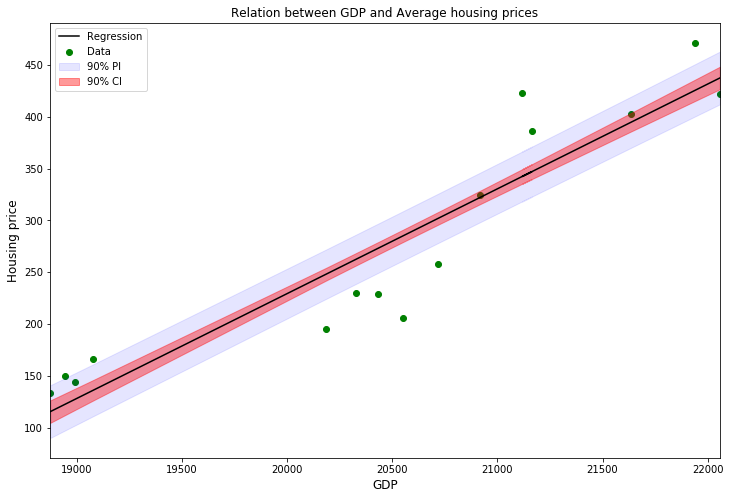

In [73]:
plt.figure(figsize=(12,8))
y = df['house']
plt.scatter(df['gdp'], df['house'], label = "Data", color = "green")
plt.plot(df['gdp'], beta0 + beta1 * x, label = "Regression", color = "black")

plt.fill_between(df['gdp'], beta0 + beta1 * x - t_crit * np.sqrt(sigma2 * (1 + 1/len(y) + (x - x_bar)**2/((x-x_bar)**2).sum())), beta0 + beta1 * x + t_crit * np.sqrt(sigma2 * (1 + 1/len(y) + (x - x_bar)**2/((x-x_bar)**2).sum())), color = 'blue', alpha = 0.1, label = '90% PI')
plt.fill_between(df['gdp'], beta0 + beta1 * x - t_crit * np.sqrt(sigma2 * (1/len(y) + (x - x_bar)**2/((x-x_bar)**2).sum())), beta0 + beta1 * x + t_crit * np.sqrt(sigma2 * (1/len(y) + (x - x_bar)**2/((x-x_bar)**2).sum())), color = 'red', alpha = 0.4, label = '90% CI')

plt.legend()
plt.xlabel("GDP", fontsize = 12)
plt.ylabel("Housing price", fontsize = 12)
plt.title("Relation between GDP and Average housing prices")
plt.xlim(min(x), max(x))
plt.show()